In [22]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [23]:
schools = Path("../Resources/schools_complete.csv")
students = Path("../Resources/students_complete.csv")
schools_df = pd.read_csv(schools)
students_df = pd.read_csv(students)
schools_df.head()

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [24]:
students_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [25]:
merged_df = pd.merge(students_df, schools_df, how="left")
merged_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [26]:
#The first thing is to establish the group, THEN pick a column you wish to aggregate in some way
school_group = merged_df.groupby("school_name")
math_score_avg = school_group["math_score"].mean()
math_score_avg

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [27]:
#Create a condition which returns a df (accomplished by returning columns) Then use that df to group and return an aggregation
femme_score = merged_df.loc[merged_df["gender"] == "F", :]
guy_score = merged_df.loc[merged_df["gender"] == "M", :]
femme_math_avg = femme_score.groupby("gender")["math_score"].mean()
guy_math_avg = guy_score.groupby("gender")["math_score"].mean()
femme_math_avg, guy_math_avg

(gender
 F    79.038865
 Name: math_score, dtype: float64,
 gender
 M    78.931052
 Name: math_score, dtype: float64)

In [28]:
# Group by "gender" and calculate the mean math score for each group
gender_math_avg = merged_df.groupby("gender")["math_score"].mean()

# Extract the mean math scores for female and male separately
femme_math_avg = gender_math_avg.loc["F"]
guy_math_avg = gender_math_avg.loc["M"]

print(femme_math_avg, guy_math_avg)


79.03886496072967 78.93105222536661


In [29]:
merged_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [30]:
#Including a list in the groupby to return two columns and the aggregated information
small_school = merged_df.loc[merged_df["size"] < 3000, :]
small_school_math = small_school.groupby(["size", "school_name"])["math_score"].mean()
small_school_math

size  school_name         
427   Holden High School      83.803279
962   Pena High School        83.839917
1468  Griffin High School     83.351499
1635  Thomas High School      83.418349
1761  Shelton High School     83.359455
1800  Wright High School      83.682222
1858  Cabrera High School     83.061895
2283  Wilson High School      83.274201
2739  Ford High School        77.102592
2917  Huang High School       76.629414
2949  Figueroa High School    76.711767
Name: math_score, dtype: float64

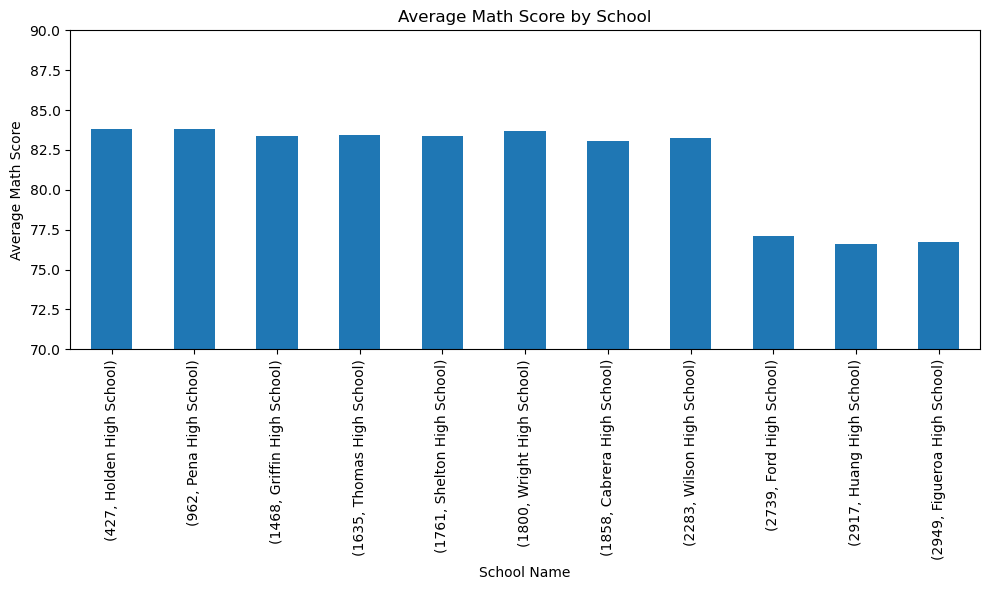

In [34]:
#Schools with less than 3000 students is why there is only 11
small_school_math.plot(kind="bar", figsize=(10, 6))

plt.xlabel("School Name")
plt.ylabel("Average Math Score")
plt.title("Average Math Score by School")

plt.ylim(70, 90)
plt.tight_layout()

In [14]:
school_type_math = merged_df.groupby(["type", "school_name", "size"])["math_score"].mean()
stm_df = school_type_math.reset_index()
stm_sorted = stm_df.sort_values(["type", "size"])
stm_sorted

,type,school_name,size,math_score
2,Charter,Holden High School,427,83.803279
3,Charter,Pena High School,962,83.839917
1,Charter,Griffin High School,1468,83.351499
5,Charter,Thomas High School,1635,83.418349
4,Charter,Shelton High School,1761,83.359455
7,Charter,Wright High School,1800,83.682222
0,Charter,Cabrera High School,1858,83.061895
6,Charter,Wilson High School,2283,83.274201
10,District,Ford High School,2739,77.102592
12,District,Huang High School,2917,76.629414


In [20]:
school_budget_math = merged_df.groupby(["school_name","size", "budget"])["math_score"].mean()
sbm_df = school_budget_math.reset_index()
sbm_sorted = sbm_df.sort_values("math_score", ascending=False)
sbm_sorted["budget_per_student"] = sbm_df["budget"] / sbm_df["size"] 
sbm_sorted

,school_name,size,budget,math_score,budget_per_student
9,Pena High School,962,585858,83.839917,609.0
6,Holden High School,427,248087,83.803279,581.0
14,Wright High School,1800,1049400,83.682222,583.0
12,Thomas High School,1635,1043130,83.418349,638.0
11,Shelton High School,1761,1056600,83.359455,600.0
4,Griffin High School,1468,917500,83.351499,625.0
13,Wilson High School,2283,1319574,83.274201,578.0
1,Cabrera High School,1858,1081356,83.061895,582.0
5,Hernandez High School,4635,3022020,77.289752,652.0
3,Ford High School,2739,1763916,77.102592,644.0


(560.0, 700.0)

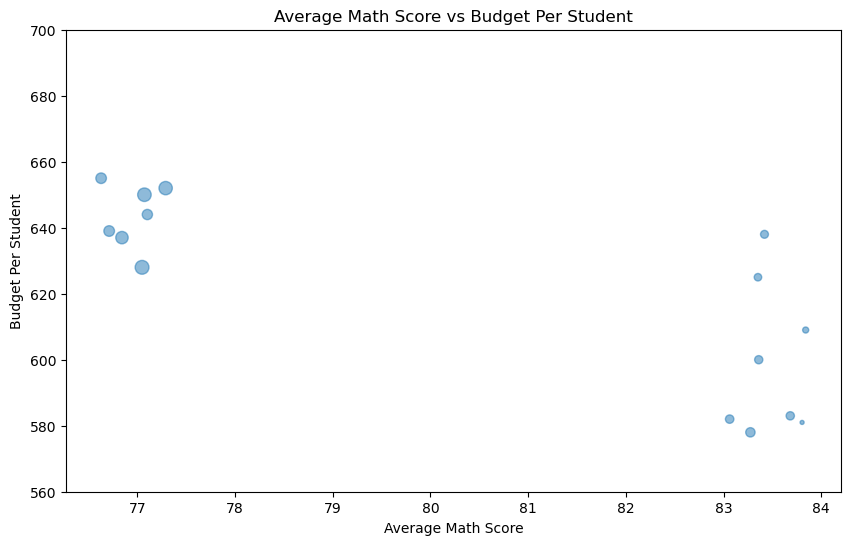

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(sbm_sorted["math_score"], sbm_sorted["budget_per_student"], s=sbm_sorted["size"]/50, alpha=0.5)

# Add labels and title
plt.xlabel('Average Math Score')
plt.ylabel('Budget Per Student')
plt.title('Average Math Score vs Budget Per Student')

#plt.colorbar(label='Budget')
plt.ylim(560, 700)

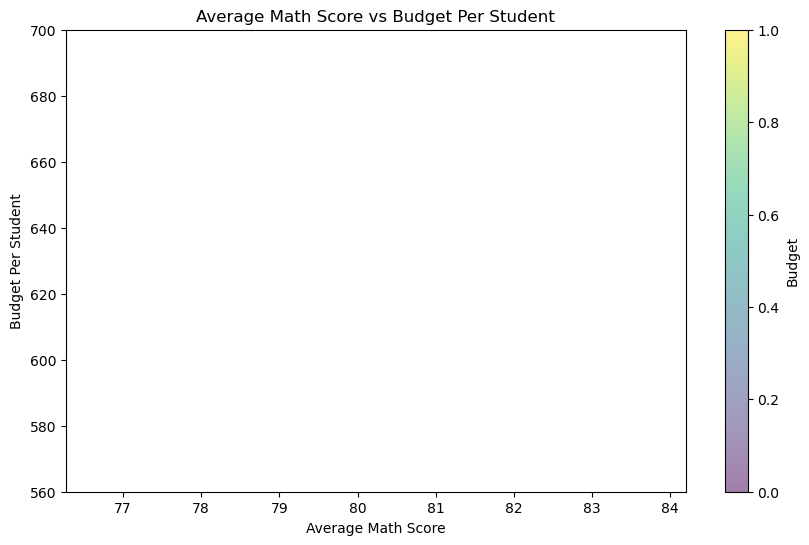

In [49]:
import matplotlib.pyplot as plt

# Assuming 'sbm_sorted' DataFrame is your sorted DataFrame

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sbm_sorted['math_score'], sbm_sorted['budget_per_student'], s=sbm_sorted['budget']/100000, c='white', alpha=0.5)

# Add labels and title
plt.xlabel('Average Math Score')
plt.ylabel('Budget Per Student')
plt.title('Average Math Score vs Budget Per Student')

# Add a colorbar legend for the size of the points
plt.colorbar(label='Budget')
plt.ylim(560, 700)

# Show the plot
plt.show()

